In [1]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib import pyplot as plt
import matplotlib as mpl
from hdf5manager import hdf5manager as h5
from pandas import pandas as pd
from pandas import DataFrame
from skimage.measure import label, regionprops
import scipy
import scipy.ndimage.filters as filters
import scipy.ndimage as ndimage
from scipy.ndimage.filters import gaussian_filter, convolve
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion
from scipy.ndimage.filters import maximum_filter
from scipy.stats import multivariate_normal as mvn
from scipy.spatial.distance import cdist
from skimage.morphology import disk, watershed
from skimage.morphology import erosion, dilation, opening, closing
from opticFlow import opticFlow as of
import colorsys
import wholeBrain as wb
from waveletAnalysis import waveletAnalysis as wave
import cv2
import os
import seaborn as sns
from time import time

Error importing slackNotify.py
	 ERROR :  No module named 'slacker'


In [2]:
path = '/Users/emmadionne/Documents/'
file = '170721_07_c1_gridOpticFlow_metrics.csv'
tsv_output_file = path + file
data_big = pd.DataFrame.from_csv(tsv_output_file)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  after removing the cwd from sys.path.


In [3]:
%matplotlib inline
col_list = list(data_big)
#puts the paramter on a scale of 0 to 1
data_big = data_big.copy()
data_big -= data_big.min()
data_big /= data_big.max()
data_big = data_big.fillna(value=0)

In [4]:
indices_big = np.zeros(len(data_big))
indices_big[2445 : 3388] = 1
indices_big[5166 : 5569] = 1
indices_big[8617 : 9298] = 1
indices_big[11751 : 12024] = 1
indices_big[15367 : 15889] = 1
indices_big[17619 : 17964] = 1
data_big['classification'] = indices_big

In [44]:
o_var = pd.DataFrame()
o_var["mov.mean"] = data_big["mov.mean"]
o_var["mov.surfarea"] = data_big["mov.surfarea"]
o_var["mov.diffxystd"] = data_big["mov.diffxystd"]
o_var["mov.diffmaxevents"] = data_big["mov.diffmaxevents"]
o_var["brain.data"] = data_big["brain.data"]
o_var["diff.brainmov"] = data_big["diff.brainmov"]
o_var["classification"] = data_big["classification"]
o_var["brain.eventrest"] = data_big["brain.eventrest"]
o_var["mov.timetoevent"] = data_big["mov.timetoevent"]
o_var["mov.timefromevent"] = data_big["mov.timefromevent"]

o_var_names = ["mov.mean", "mov.surfarea", "mov.diffxystd", "mov.diffmaxevents", "brain.data", "diff.brainmov", "classification", "brain.eventrest", "mov.timetoevent", "mov.timefromevent"]

b_var = pd.DataFrame()
b_var["mov.range"] = data_big["mov.range"]
b_var["mov.eventrest"] = data_big["mov.eventrest"]
b_var["mov.surfarea"] = data_big["mov.surfarea"]
b_var["mov.diffxystd"] = data_big["mov.diffxystd"]
b_var["mov.diffmaxevents"] = data_big["mov.diffmaxevents"]
b_var["mov.percenterror"] = data_big["mov.percenterror"]
b_var["brain.data"] = data_big["brain.data"]
b_var["brain.eventrest"] = data_big["brain.eventrest"]
b_var["brain.rangemaxmin"] = data_big["brain.rangemaxmin"]
b_var["diff.brainmov"] = data_big["diff.brainmov"]
b_var["classification"] = data_big["classification"]

b_var_names = ["mov.range", "mov.eventrest", "mov.surfarea", "mov.diffxystd", "mov.diffmaxevents", 
             "mov.percenterror", "brain.data", "brain.eventrest", "brain.rangemaxmin", "diff.brainmov", "classification"]


data_big_names = ["angs.stdev", "angs.mean", "mov.mean", "mov.std","mov.mode", "mov.range", "mov.eventrest", "mov.maxeventval", 
                  "mov.surfarea", "mov.totalmag", "mov.firstder", "mov.secder", "mov.stdx", "mov.stdy", "mov.diffmaxevents", 
                 "mov.percent", "mov.percenterror", "mov.timetoevent", "mov.timefromevent", "mov.numlocmax", "brain.data", "brain.eventrest", "brain.rangemaxmin", 
                  "brain.firstder", "brain.secondder", "diff.brainmov", "diff.brainmovfirstder", "diff.brainmovsecder", "classification"]

## t-SNE Clustering

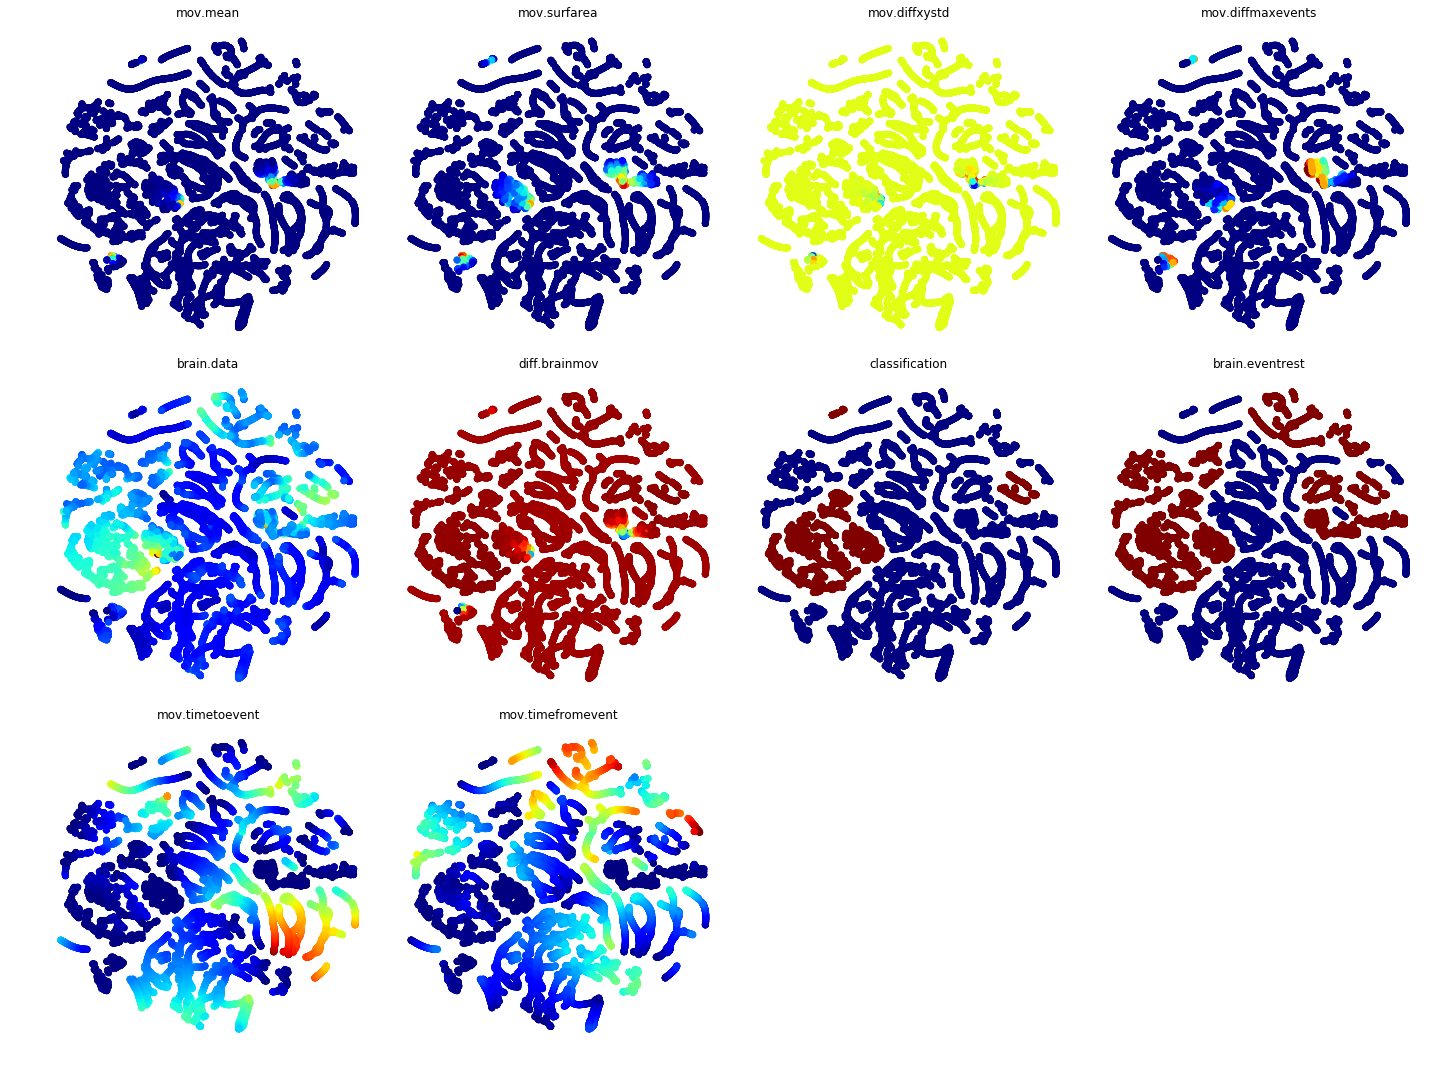

In [58]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(o_var)

fig, ax = plt.subplots(3, 4, figsize = (20, 15), sharex = True, sharey = True)
k = 0
for i in range(3):
    for j in range(4):
        if k != 10:
            ax[i][j].scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=data_big[o_var_names[k]], cmap='jet')
            ax[i][j].title.set_text('{0}'.format(o_var_names[k]))
            ax[i][j].axis('off')
            k += 1
        else:
            pass
            ax[i][j].axis('off')
plt.tight_layout()
plt.show()

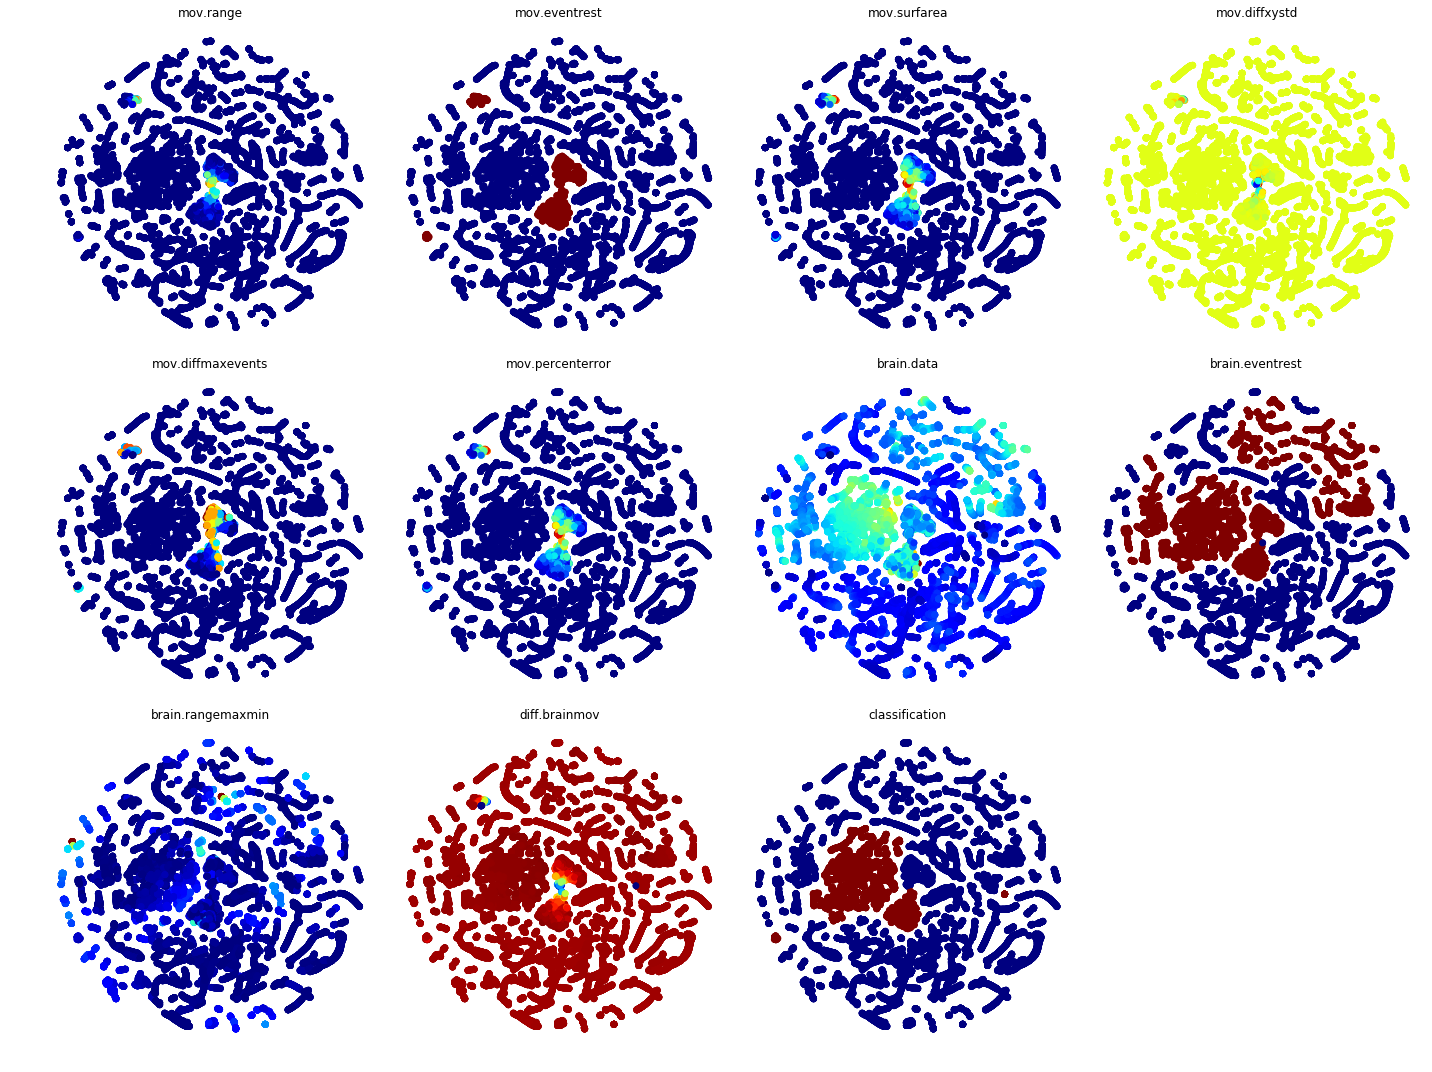

In [36]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(data_big)

fig, ax = plt.subplots(3, 4, figsize = (20, 15), sharex = True, sharey = True)
k = 0
for i in range(3):
    for j in range(4):
        if k != 11:
            ax[i][j].scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=data_big[b_var_names[k]], cmap='jet')
            ax[i][j].title.set_text('{0}'.format(b_var_names[k]))
            ax[i][j].axis('off')
            k += 1
        else:
            pass
            ax[i][j].axis('off')
plt.tight_layout()
plt.show()

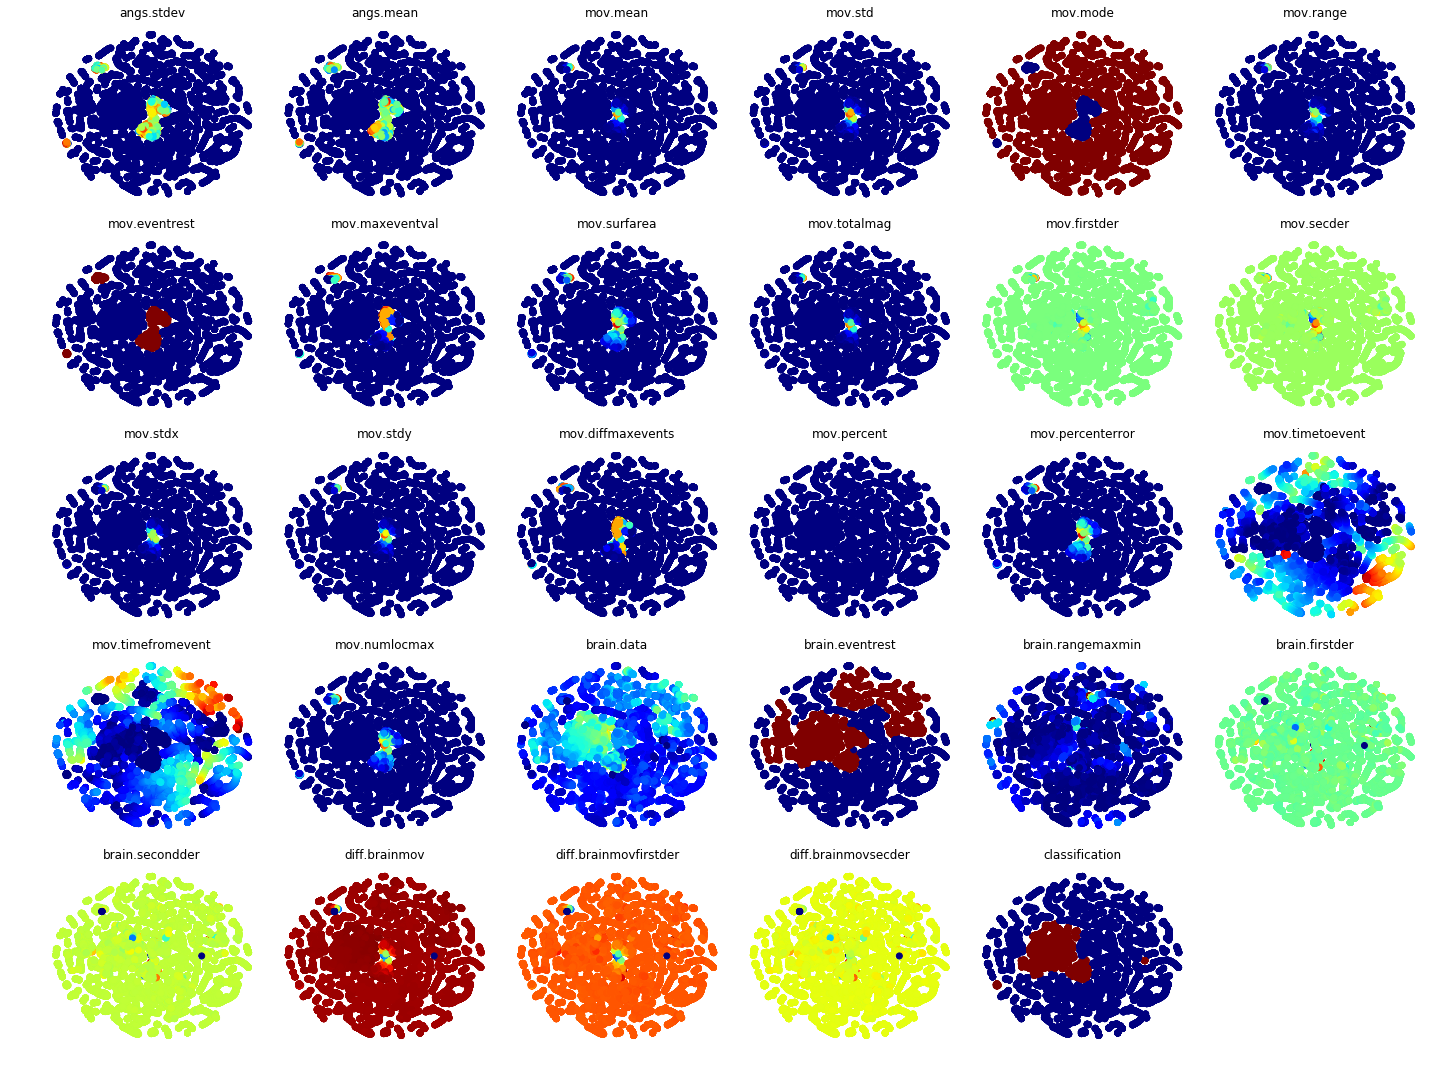

In [11]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(data_big)

fig, ax = plt.subplots(5, 6, figsize = (20, 15), sharex = True, sharey = True)
k = 0
for i in range(5):
    for j in range(6):
        if k != 29:
            ax[i][j].scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=data_big[data_big_names[k]], cmap='jet')
            ax[i][j].title.set_text('{0}'.format(data_big_names[k]))
            ax[i][j].axis('off')
            k += 1
        else:
            pass
            ax[i][j].axis('off')
plt.tight_layout()
plt.show()

## Isomap Clustering

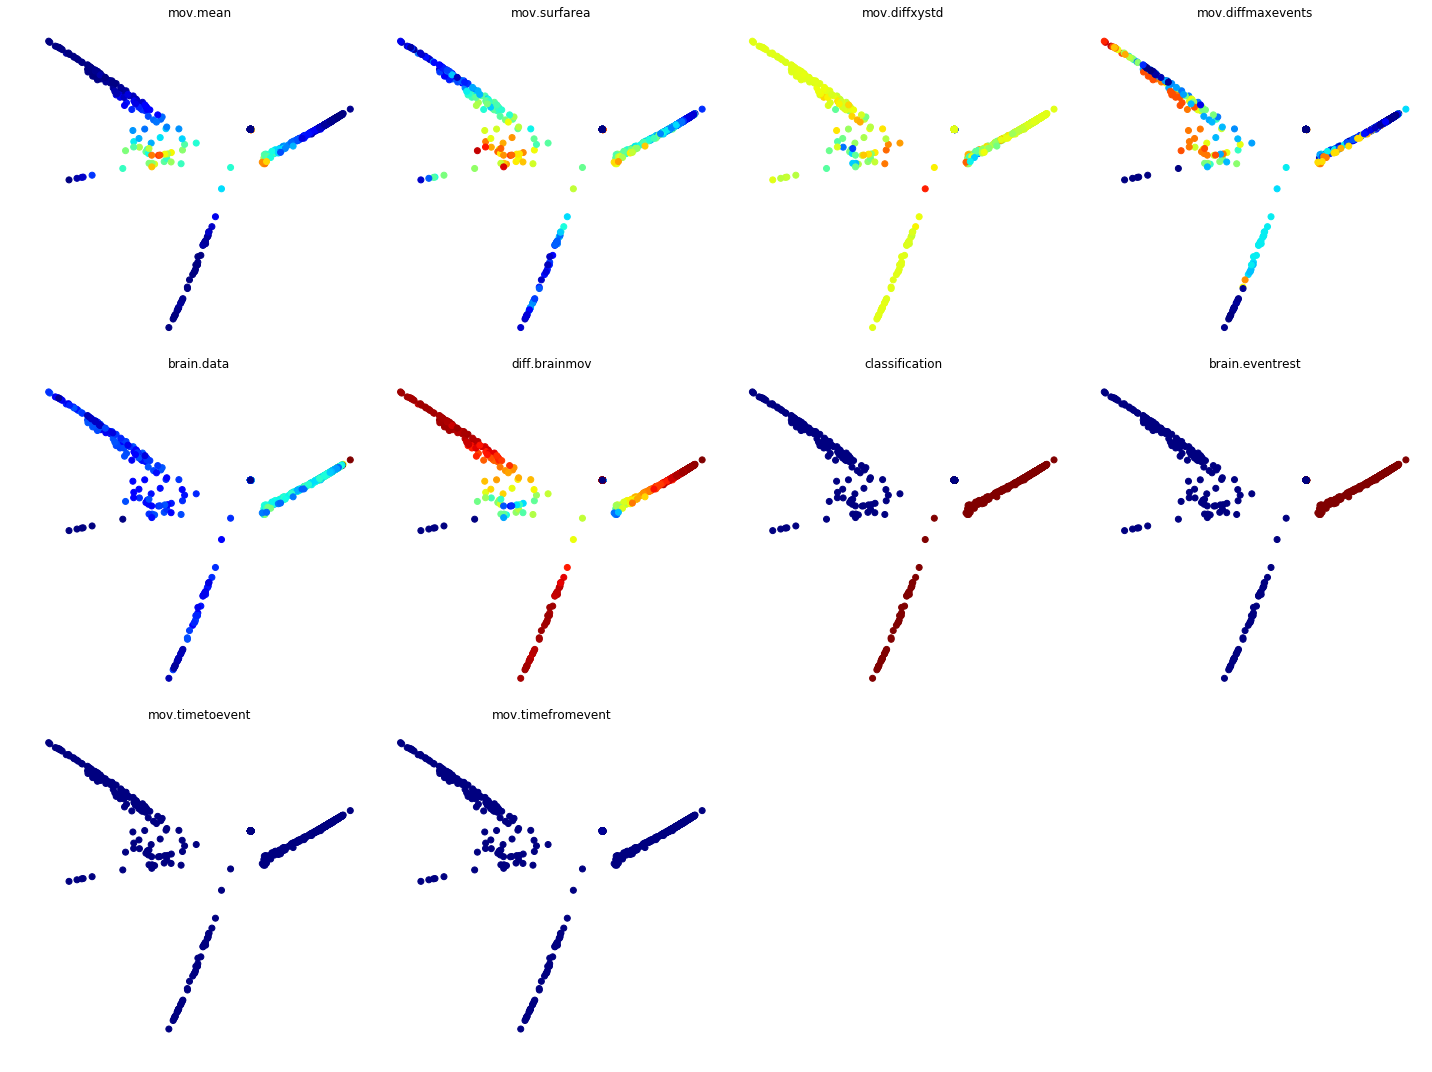

In [45]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(data_big)

fig, ax = plt.subplots(3, 4, figsize = (20, 15), sharex = True, sharey = True)
k = 0
for i in range(3):
    for j in range(4):
        if k != 10:
            ax[i][j].scatter(X_reduced_isomap[:, 0], X_reduced_isomap[:, 1], c=data_big[o_var_names[k]], cmap='jet')
            ax[i][j].title.set_text('{0}'.format(o_var_names[k]))
            ax[i][j].axis('off')
            k += 1
        else:
            pass
            ax[i][j].axis('off')
plt.tight_layout()
plt.show()

Kmeans

[0 0 0 ... 0 0 0]


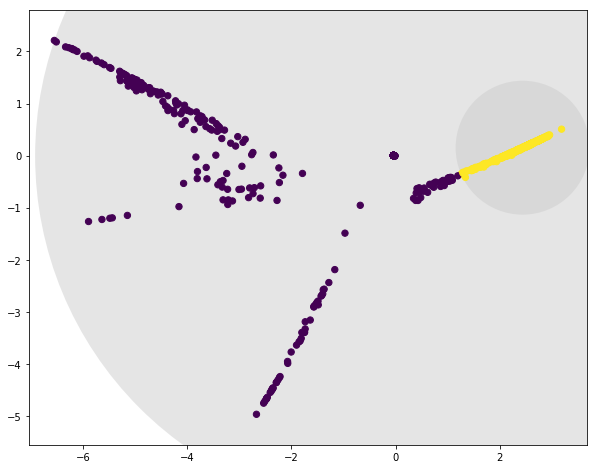

In [56]:
kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(X_reduced_isomap)
prediction = kmeans.predict(X_reduced_isomap)

colors = ["blue", "red", "orange", "yellow", "green", "purple"]

plt.figure(figsize = (10,8))
def plot_kmeans(kmeans, X, n_clusters=2, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)
    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
    return labels

indices = kmeans.fit_predict(X_reduced_isomap)
plot_kmeans(kmeans, X_reduced_isomap)

print(indices)

DBSCAN

Automatically created module for IPython interactive environment


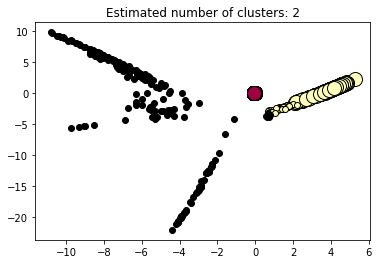

In [55]:
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
#centers = [[1, 1], [-1, -1], [1, -1]]

X = X_reduced_isomap
# X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
#                             random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=2, min_samples=100).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# print('Estimated number of clusters: %d' % n_clusters_)
# print('Estimated number of noise points: %d' % n_noise_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f"
#       % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f"
#       % metrics.adjusted_mutual_info_score(labels_true, labels,
#                                            average_method='arithmetic'))
# print("Silhouette Coefficient: %0.3f"
#       % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

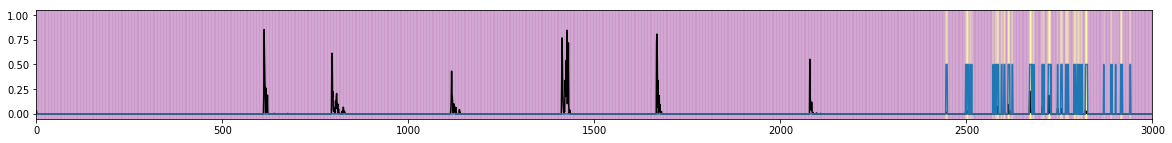

In [57]:
def plot_classification(data, indices, color):
    fig = plt.figure(figsize = (20, 2))
    colors_list = ["violet", "magenta", "teal", "silver", "salmon", "pink"]
    num_color = 0;
    if (len(np.unique(indices)) > 2):
        for i in range(len(indices)):
            if (indices[i] == 0):
                plt.axvline(x = i, color = 'blue', alpha = 0.01)
            elif (indices[i] == 1):
                plt.axvline(x = i, color = 'orange')
            elif (indices[i] == 2):
                plt.axvline(x = i, color = 'green')
            elif (indices[i] == 3 ):
                plt.axvline(x = i, color = 'purple', alpha = 0.1)
            else:
                if (num_color == len(colors_list)):
                    num_color = 0
                else:
                    plt.axvline(x = i, color = colors_list[num_color], alpha = 0.01)
                    num_color += num_color
                
    else:
        for i in range(len(indices)):
            if (indices [i] == 0):
                plt.axvline(x = i, color = 'purple', alpha = 0.1)
            elif (indices [i] == 1):
                plt.axvline(x = i, color = 'yellow', alpha = 0.1)
    
    plt.plot(data, color)
    plt.plot(indices/2)
    plt.xlim([0 , 3000])
plot_classification(data_big["mov.mean"], indices, "black")

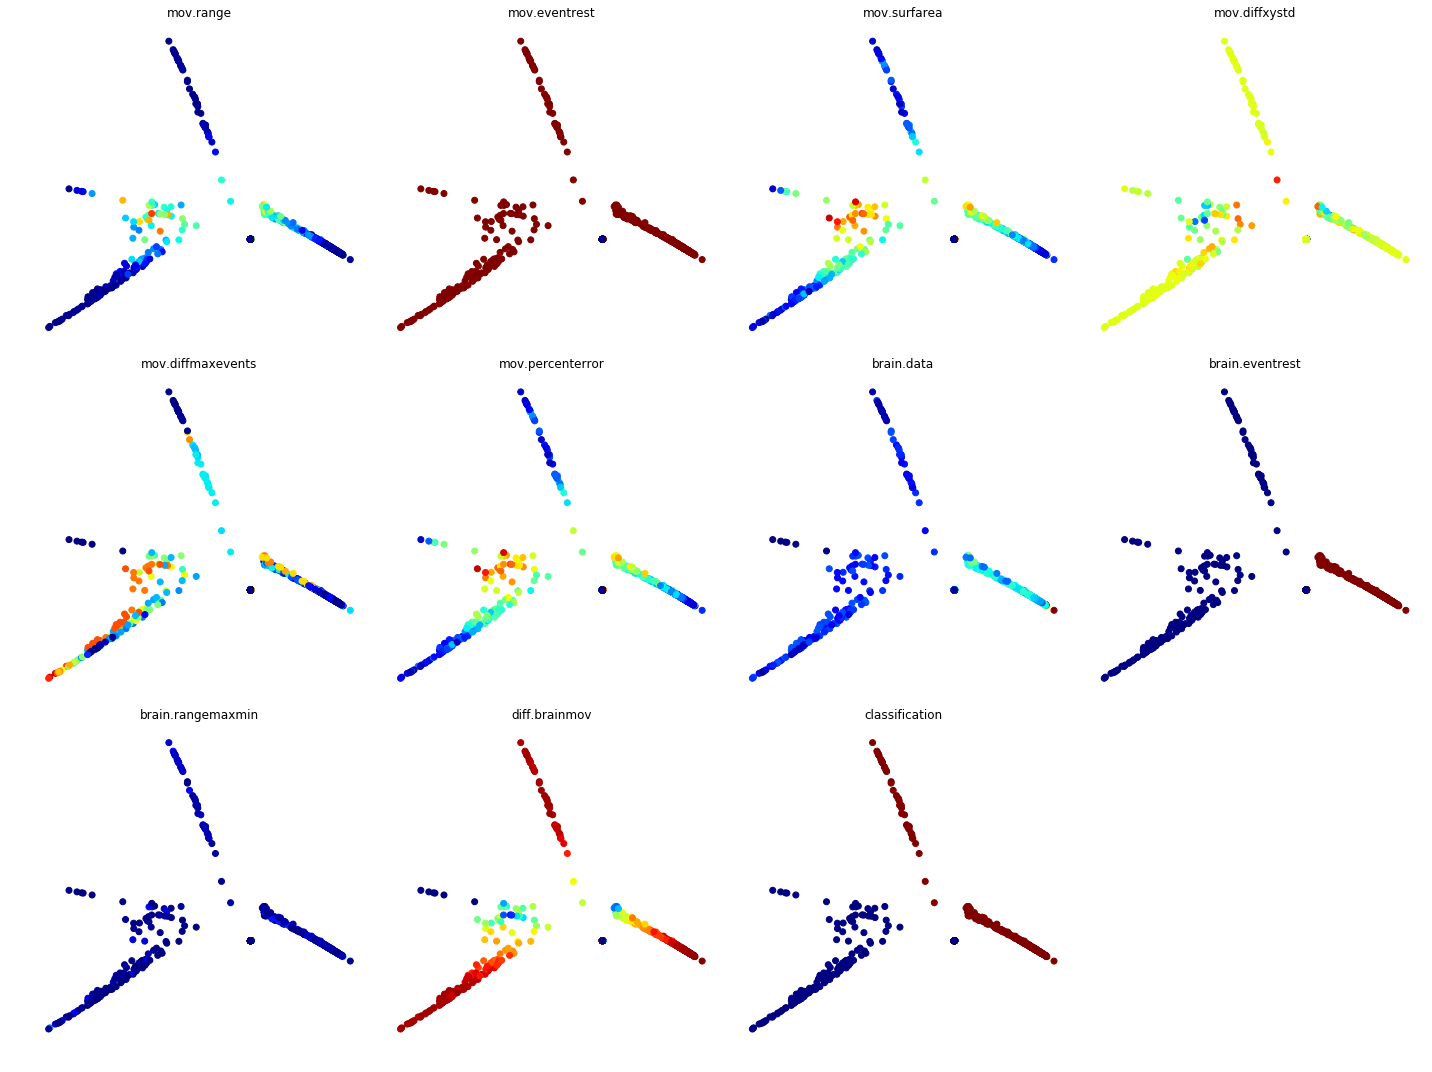

In [13]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(data_big)

fig, ax = plt.subplots(3, 4, figsize = (20, 15), sharex = True, sharey = True)
k = 0
for i in range(3):
    for j in range(4):
        if k != 11:
            ax[i][j].scatter(X_reduced_isomap[:, 0], X_reduced_isomap[:, 1], c=data_big[b_var_names[k]], cmap='jet')
            ax[i][j].title.set_text('{0}'.format(b_var_names[k]))
            ax[i][j].axis('off')
            k += 1
        else:
            pass
            ax[i][j].axis('off')
plt.tight_layout()
plt.show()

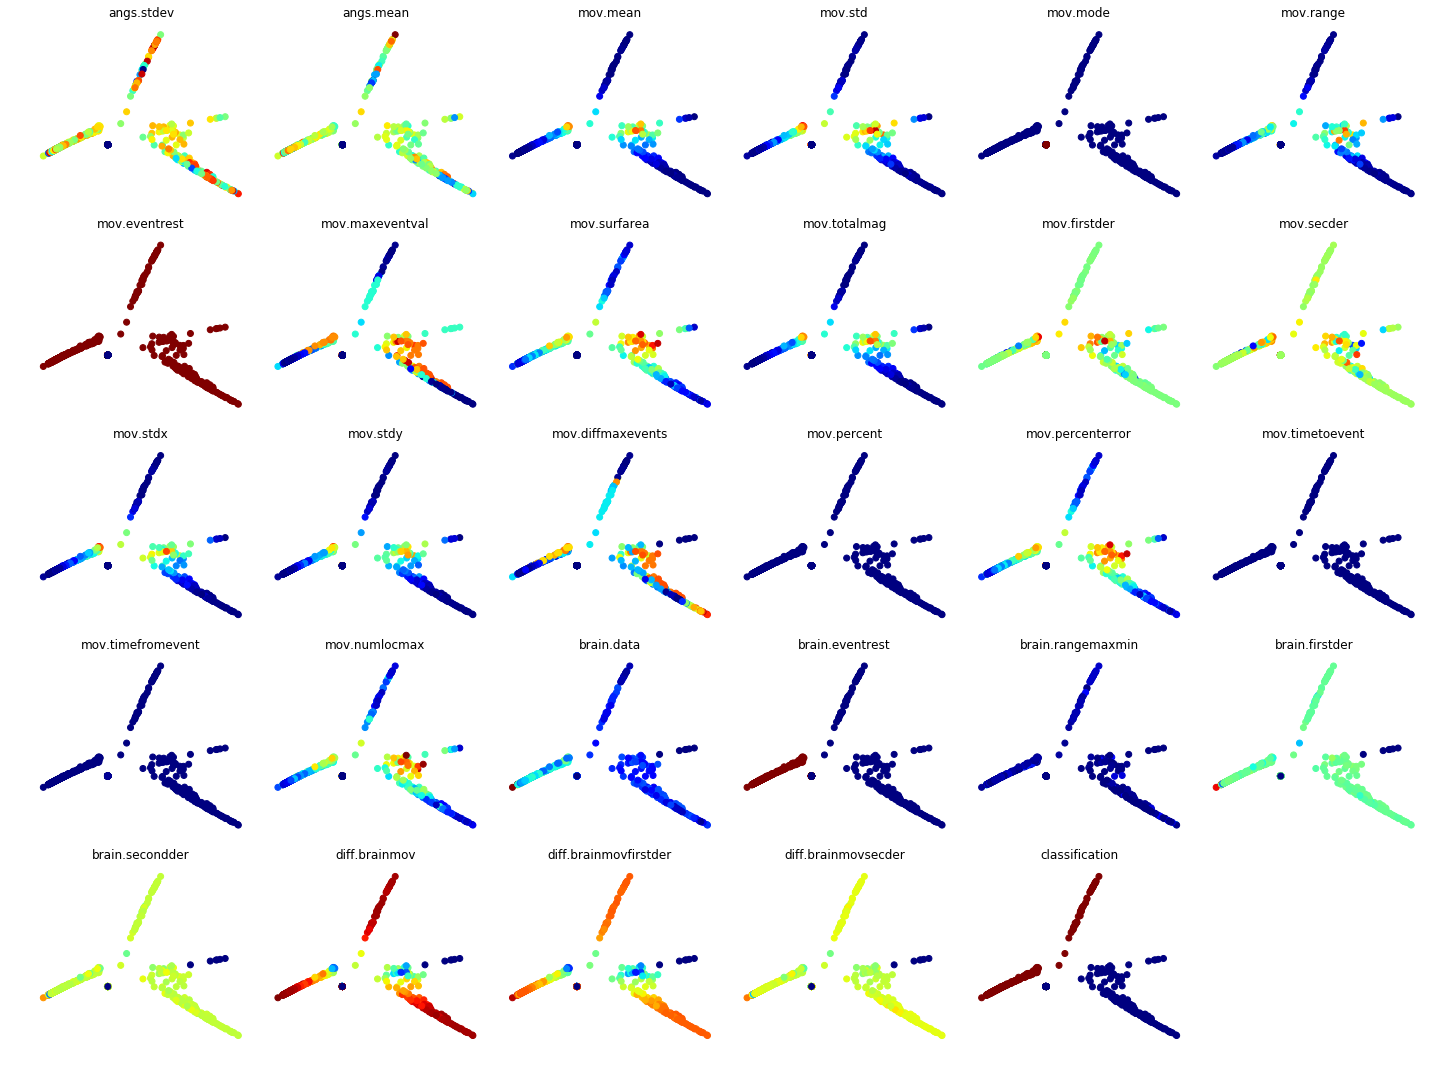

In [14]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(data_big)

fig, ax = plt.subplots(5, 6, figsize = (20, 15), sharex = True, sharey = True)
k = 0
for i in range(5):
    for j in range(6):
        if k != 29:
            ax[i][j].scatter(X_reduced_isomap[:, 0], X_reduced_isomap[:, 1], c=data_big[data_big_names[k]], cmap='jet')
            ax[i][j].title.set_text('{0}'.format(data_big_names[k]))
            ax[i][j].axis('off')
            k += 1
        else:
            pass
            ax[i][j].axis('off')
plt.tight_layout()
plt.show()

## MDS Clustering

In [ ]:
print("0. I am here!")
from sklearn.manifold import MDS
print("1. I am here!")

mds = MDS(n_components=2, random_state=42)

print("2. I am here!")
X_reduced_mds = mds.fit_transform(data_big)
print("3. I am here!")

fig, ax = plt.subplots(2, 4, figsize = (20, 15), sharex = True, sharey = True)
print("4. I am here!")

k = 0
print(k)
for i in range(2):
    for j in range(4):
        if k != 7:
            ax[i][j].scatter(X_reduced_mds[:, 0], X_reduced_mds[:, 1], c=data_big[o_var_names[k]], cmap='jet')
            ax[i][j].title.set_text('{0}'.format(o_var_names[k]))
            ax[i][j].axis('off')
            k += 1
        else:
            pass
            ax[i][j].axis('off')
        print(k)
plt.tight_layout()
plt.show()

0. I am here!
1. I am here!
2. I am here!


In [ ]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(data_big)

fig, ax = plt.subplots(3, 4, figsize = (20, 15), sharex = True, sharey = True)
k = 0
for i in range(3):
    for j in range(4):
        if k != 11:
            ax[i][j].scatter(X_reduced_mds[:, 0], X_reduced_mds[:, 1], c=data_big[b_var_names[k]], cmap='jet')
            ax[i][j].title.set_text('{0}'.format(b_var_names[k]))
            ax[i][j].axis('off')
            k += 1
        else:
            pass
            ax[i][j].axis('off')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(data_big)

fig, ax = plt.subplots(5, 6, figsize = (20, 15), sharex = True, sharey = True)
k = 0
for i in range(5):
    for j in range(6):
        if k != 29:
            ax[i][j].scatter(X_reduced_mds[:, 0], X_reduced_mds[:, 1], c=data_big[data_big_names[k]], cmap='jet')
            ax[i][j].title.set_text('{0}'.format(data_big_names[k]))
            ax[i][j].axis('off')
            k += 1
        else:
            pass
            ax[i][j].axis('off')
plt.tight_layout()
plt.show()

## LDA Clustering

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
X_mnist = np.asarray(data_big["mov.mean"])
y_mnist = np.asarray(data_big["classification"])
lda.fit(X_mnist, y_mnist)
X_reduced_lda = lda.transform(X_mnist)

ValueError: cannot reshape array of size 17999 into shape (1,)